In [1]:
import pandas as pd
from exp_data_analysis import ExpDataAnalysis
from data_clean import CleanData
from cls_models import ClsModel
from reg_models import RegModel
from kmeans_cluster import KMeansCluster

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

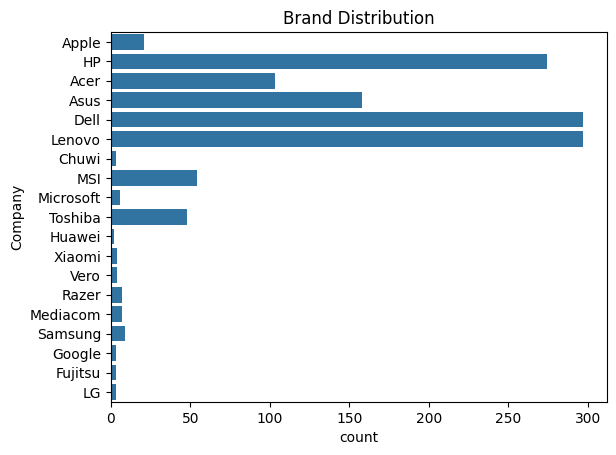

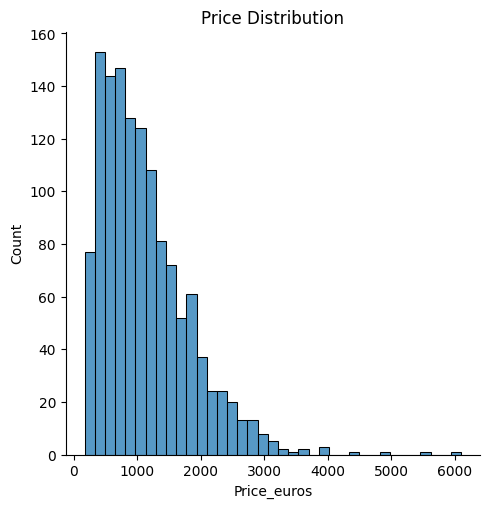

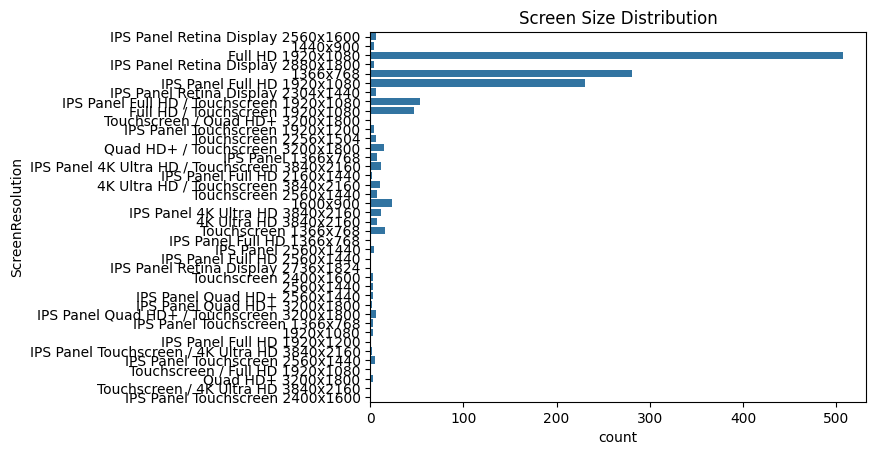

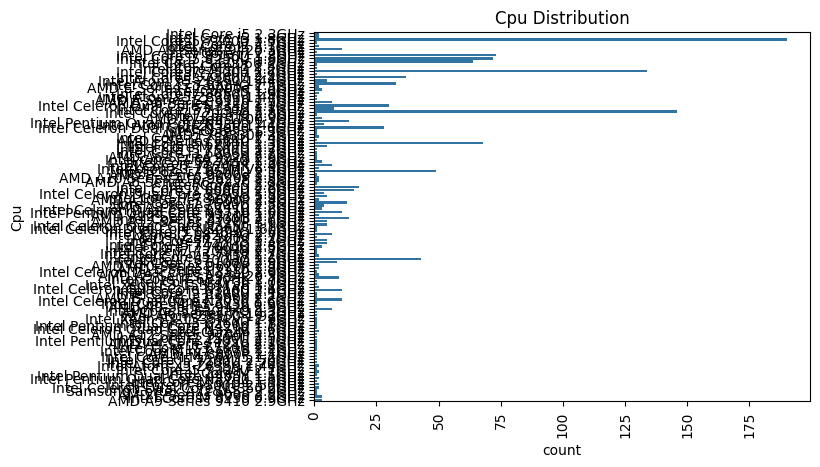

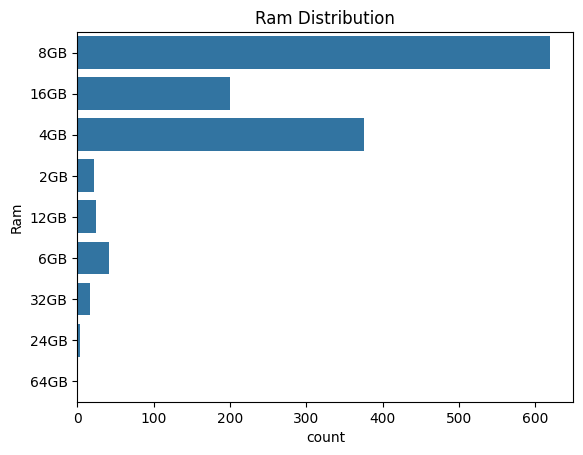

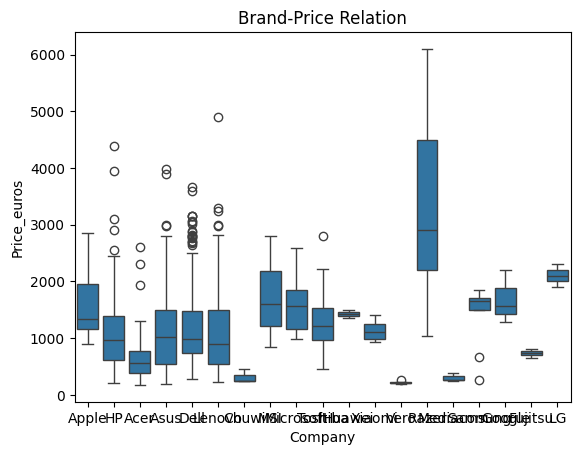

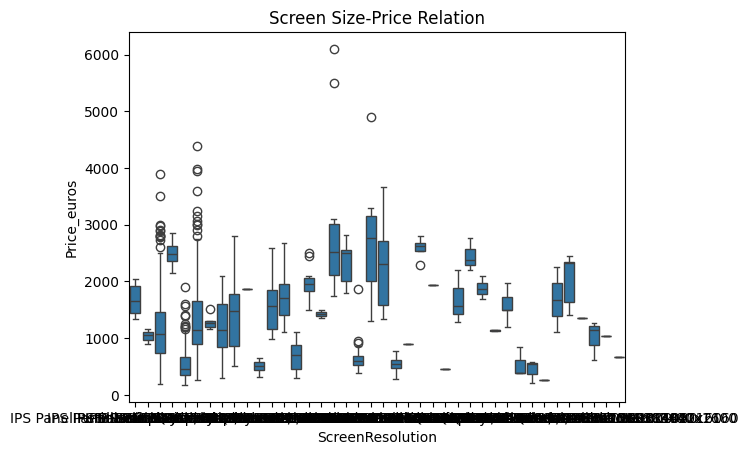

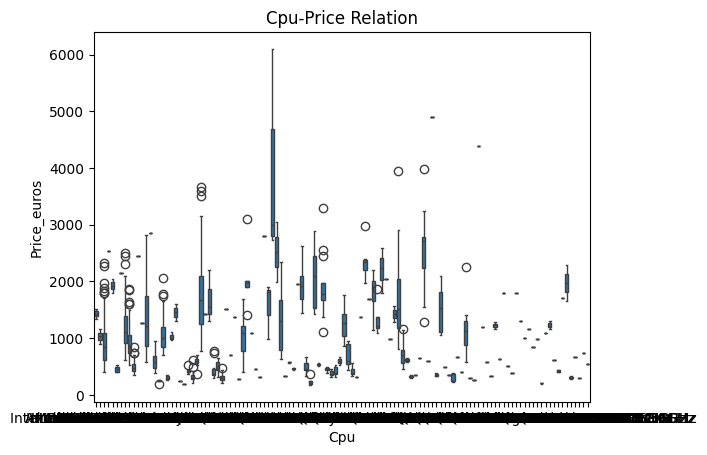

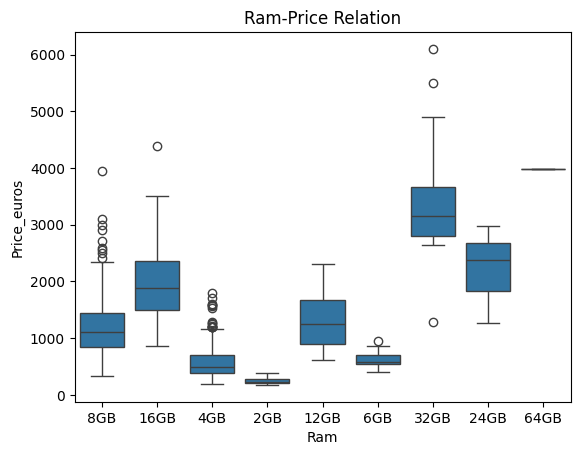

ValueError: could not convert string to float: 'Apple'

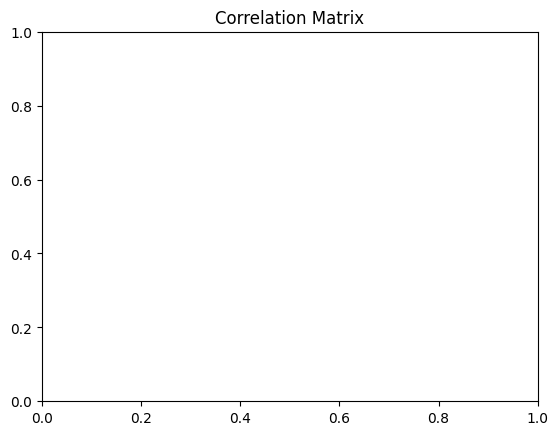

In [3]:
expData = ExpDataAnalysis(df)
expData.getMissingValues()
expData.getBrandDistribution()
expData.getPriceDistribution()
expData.getScreenSizeDistribution()
expData.getCpuDistribution()
expData.getRamDistribution()
expData.getCompanyPriceRelation()
expData.getScreenSizePriceRelation()
expData.getCpuPriceRelation()
expData.getRamPriceRelation()
expData.getCorrelationMatrix()
expData.getStatInsights()

In [4]:
clean = CleanData()

In [5]:
df_cleaned = clean.formatResolution(df)
df_cleaned = clean.formatScreenSize(df_cleaned)
df_cleaned = clean.clean_numeric_column(df_cleaned, 'Ram', 'GB')
df_cleaned = clean.clean_numeric_column(df_cleaned, 'Weight', 'kg')
df_cleaned = clean.categorize_by_price(df_cleaned)
df_cleaned = clean.seperate_memory_type(df_cleaned)
df_cleaned = clean.clean_numeric_column(df_cleaned, 'Memory', 'GB')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'Company')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'TypeName')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'OpSys')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'Gpu')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'Cpu')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'MemoryType')
df_cleaned = clean.turn_to_categorical(df_cleaned, 'Product')

In [6]:
df_cleaned.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution_Width,Resolution_Height,PriceRange,MemoryType
0,1,0,0,0,13.3,0,8,128.0,0,0,1.37,1339.69,2560,1600,2,0
1,2,0,1,0,13.3,1,8,128.0,1,0,1.34,898.94,1440,900,1,1
2,3,1,2,1,15.6,2,8,256.0,2,1,1.86,575.00,1920,1080,0,0
3,4,0,0,0,15.4,3,16,512.0,3,0,1.83,2537.45,2880,1800,3,0
4,5,0,0,0,13.3,4,8,256.0,4,0,1.37,1803.60,2560,1600,3,0


In [7]:
X = df_cleaned[['Ram', 'Cpu', 'Resolution_Width', 'Resolution_Height', 'Inches', 'Memory', 'MemoryType']]
y = df_cleaned['PriceRange']

In [8]:
cls = ClsModel()

In [9]:
print(cls.randomForest(X, y))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        89
           1       0.57      0.59      0.58        93
           2       0.54      0.53      0.54       105
           3       0.69      0.66      0.68       104

    accuracy                           0.63       391
   macro avg       0.63      0.63      0.63       391
weighted avg       0.63      0.63      0.63       391



In [10]:
print(cls.gradientBoosting(X, y))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.64      0.58      0.61        93
           2       0.55      0.60      0.58       105
           3       0.73      0.69      0.71       104

    accuracy                           0.68       391
   macro avg       0.68      0.68      0.68       391
weighted avg       0.68      0.68      0.67       391



In [11]:
print(cls.logisticRegression(X, y))

              precision    recall  f1-score   support

           0       0.65      0.80      0.71        89
           1       0.45      0.27      0.34        93
           2       0.47      0.58      0.52       105
           3       0.71      0.64      0.67       104

    accuracy                           0.57       391
   macro avg       0.57      0.57      0.56       391
weighted avg       0.57      0.57      0.56       391



In [12]:
X = df_cleaned[['Ram', 'Cpu', 'Resolution_Width', 'Resolution_Height', 'Inches', 'Memory', 'MemoryType']]
y = df_cleaned['Price_euros']

In [13]:
reg = RegModel()

In [14]:
print(reg.randomForest(X, y))

(np.float64(161622.2471306534), np.float64(402.022694795522))


In [15]:
print(reg.gradientBoosting(X, y))

(np.float64(147553.05768287933), np.float64(384.12635640226426))


In [16]:
print(reg.linearRegression(X, y))

(np.float64(201338.96213634705), np.float64(448.70810348861215))


In [17]:
cluster = KMeansCluster()

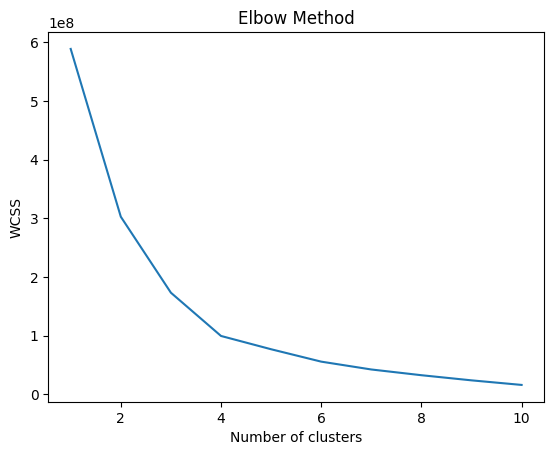

In [18]:
cluster.find_optimal_k(X)